<div style="line-height:1.2;">

<h1 style="color:#F5BA69; margin-bottom: 0.2em;"> Perceptron </h1>
<h4 style="margin-top: 0.2em; margin-bottom: 0.5em;">5 Examples using the same custom Perceptron class. </h4>

</div>

<div style="line-height:1.4; margin-top: 0.2em;">
<span>
    <h3 style="color: lightblue; display: inline; margin-right: 0.5em;">Keywords:</h3> pd display with option_context + np.dot() + np.where()</span>
</div>

In [32]:
import functools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.feature_extraction import DictVectorizer, CountVectorizer

In [11]:
#class Perceptron(object):
class Perceptron: 
    """ Perpetron classicator for binary classification tasks. 
    
    Parameters: 
        - eta = learning rate [float]
        - n_iter = passes over the training set [int]
    
    Attributes:
        - w_after = weights after fitting [numpy array]
        - errors_ep = errors in each epoch [list]
    """
    def __init__(self, eta=0.01, n_iter = 10):
        """ Constructor method to initialize the perceptron object. """
        self.eta = eta 
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """ Fit the training error, updating the weights of the perceptron using the perceptron learning rule,\\
        which involves updating the weights for each input sample.
        
        Parameters:
            - Inputs
            - Targets
        
        Returns:
            Fitted object 
        """
        # Reshape the target labels to a one-dimensional array
        y = y.reshape(-1)
        # Initialize weights (w_after) as a zero vector with one additional element for the bias
        self.w_after = np.zeros(1 + X.shape[1])
        self.errors_ep = []
        
        for i in range(self.n_iter):
            errors = 0
            # Loop over each input sample (xi) and its corresponding target label (target)
            for xi, target in zip(X, y):
                # Perceptron learning rule
                update = self.eta * (target - self.predict(xi))
                # Update the weights (excluding the bias) based on the input and update
                self.w_after[1:] += update * xi
                # Update the bias weight based on the update
                self.w_after[0] += update
                # Increment the error count if the update is not zero
                errors += int(update != 0.0)
            self.errors_ep.append(errors)
        return self

    def net_input(self, X):
        """ Calculate net input for the given input data X.\\
        The net input is computed as the dot product of the input data and the weights of the perceptron.\\
        Transpose the weights (.T) from a row vector to a column vector. 
        """
        return np.dot(X, self.w_after[1:].T) + self.w_after[0]
    
    def predict(self, X):
        """ Make predictions for the given input data (X) based on the current weights (one step).\\
        Return 1 if the net input is greater than or equal to 0, else return -1.
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [1]:
%%script echo Skipping: Older incorrect method left as example
def plot_decision_regions_old(X, y, classifier, resolution=0.02):
    """ This version create a  mesh grid with a very high resolution, resulting in a large memory allocation in the order of TB!! """
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Issue is here! 
    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1
    x3_min, x3_max = X[:, 1].min() - 1, X[:,1].max() + 1
    x4_min, x4_max = X[:, 1].min() - 1, X[:,1].max() + 1
    xx1, xx2, xx3, xx4 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                            np.arange(x2_min, x2_max, resolution),
                            np.arange(x2_min, x2_max, resolution),
                            np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx1.min(), xx1.max())

    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y==c1, 0], y=X[y==c1, 1], alpha = 0.8, c=cmap(idx), marker = markers[idx], label=c1)

Skipping: Older incorrect method left as example


In [12]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    """ Plot decision regions for a binary classification problem.

    Parameters:
        - Feature matrix of shape (n_samples, n_features)
        - Target vector of shape (n_samples,) containing class labels (1 or -1)
        - A trained binary classifier with a `predict` method
        - resolution: Grid spacing for decision boundary visualization. Default is 0.02 [float, optional]

    Details: 
        - Define marker styles and colors for different classes, 
        - Create a colormap based on the unique classes in y
        - Determine the minimum and maximum values of the 1st and 2nd feature
        
        - Create mesh grid for the decision boundary plot with the correct resolution

        - Predict the class labels for all points in the mesh grid
        - Reshape the predicted labels to match the shape of the mesh grid
        - Create a filled contour plot to visualize decision regions

        - Set the limits for the x-axis and y-axis of the plot
    """
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create mesh grid
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # Predict
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # Reshape
    Z = Z.reshape(xx1.shape)
    # Countour
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # Scatter plot the data points for each class with specified markers and colors
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == c1, 0], 
            y=X[y == c1, 1], 
            alpha=0.8, 
            # 'color' instead of 'c' => To avoid the UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence 
            color=cmap(idx),  
            marker=markers[idx], 
            label=c1
        )

<div style="line-height:0.5">
<h2 style="color:#F5BA69"> <u> Example 1 </u> <h2>
<h5> Using Iris dataset and choosing only 2 features since the defined Perceptron class is designed for binary classification problems. <h5>
</div>

In [14]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df_iris = pd.read_csv(url, header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
%%script echo skipping to avoid to print the whole daset 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_iris)

skipping to avoid to print the whole daset


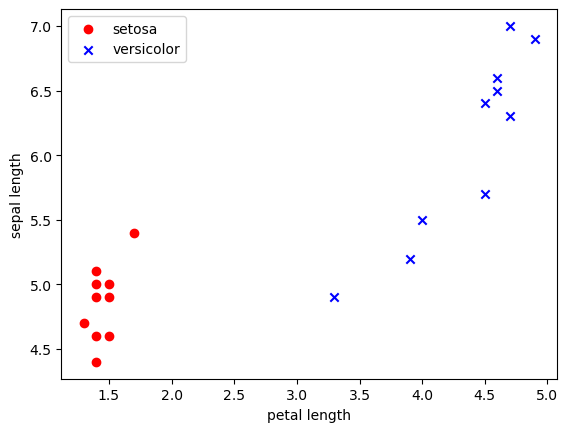

In [16]:
# Select the first 10 samples of 'setosa' class
setosa_samples = df_iris[df_iris["class"] == "Iris-setosa"].iloc[:10]
# Select the first 10 samples of 'versicolor' class
versicolor_samples = df_iris[df_iris["class"] == "Iris-versicolor"].iloc[:10]

# Concatenate the selected samples
selected_samples = pd.concat([setosa_samples, versicolor_samples])

# Extract features (petal length and sepal length) and labels
X = selected_samples.iloc[:, [2, 0]].values
y = np.where(selected_samples["class"] == "Iris-setosa", -1, 1)

####### Plot the data points for setosa and versicolor
plt.scatter(X[:10, 0], X[:10, 1], color='red', marker='o', label='setosa')
plt.scatter(X[10:, 0], X[10:, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

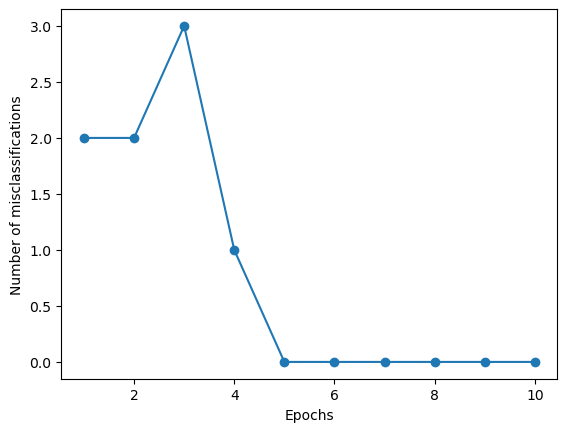

In [20]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_ep) +1), ppn.errors_ep, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

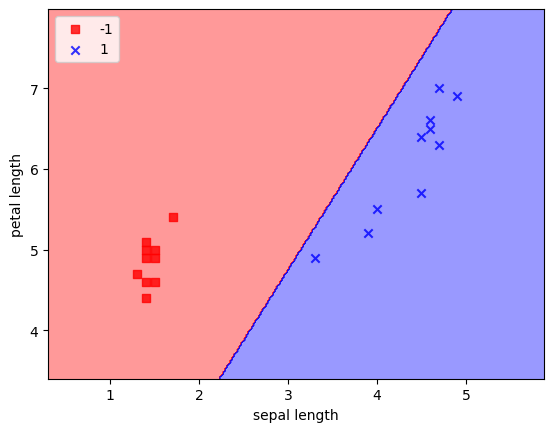

In [21]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

<div style="line-height:0.5">
<h2 style="color:#F5BA69"> <u> Example 2 </u> <h2>
<h5> Not working well, load_breast_cancer dataset is too huge, just taking a subset of it, will lead to incorrect separation. <h5>
</div>

In [47]:
data = load_breast_cancer()
num_rows = data.data.shape[0]
num_cols = data.data.shape[1]
num_rows, num_cols

(569, 30)

In [48]:
X = data.data[:, [0, 1]]        # take only the first two features for simplicity
y = data.target
y = np.where(y == 0, -1, 1)     # Malignant as -1, Benign as 1

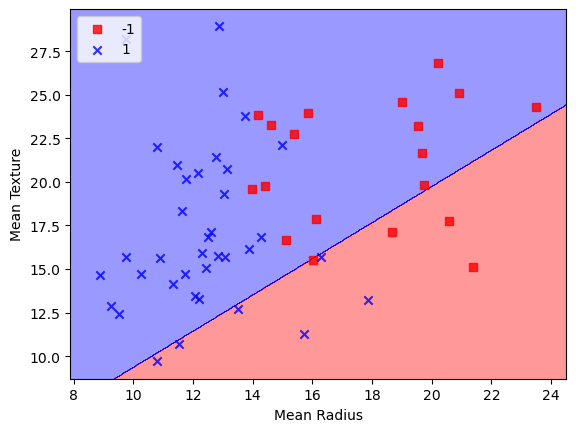

In [22]:
# Split the data into a smaller subset for plotting
X_subset, _, y_subset, _ = train_test_split(X, y, test_size=0.9, random_state=42)

ppn = Perceptron(eta=0.1, n_iter=10)
# Fit the Perceptron
ppn.fit(X_subset, y_subset)

###### Plot the decision regions and the data
plot_decision_regions(X_subset, y_subset, classifier=ppn)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend(loc='upper left')
plt.show()

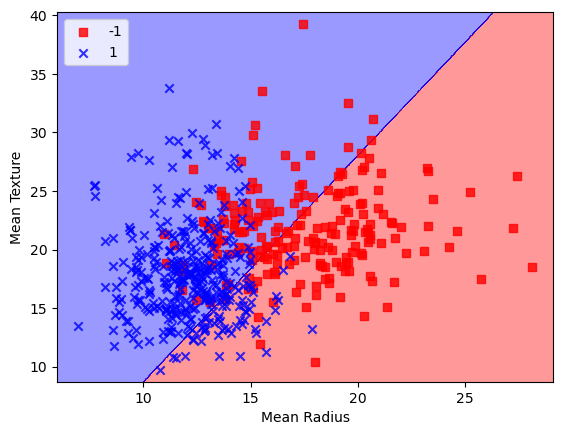

In [49]:
X = data.data[:, [0, 1]]        # take only the first two features for simplicity
y = data.target
y = np.where(y == 0, -1, 1)     # Malignant as -1, Benign as 1

# Create a Perceptron's instance
ppn = Perceptron(eta=0.1, n_iter=10)
# Fit the Perceptron
ppn.fit(X, y)

###### Plot the decision regions and the data
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend(loc='upper left')
plt.show()

<h2 style="color:#F5BA69"> <u> Example 3 </u> </h2>
<div style="margin-top: -20px;">
<h5> Using simple synthetic datasets created ad hoc </h5>
</div>

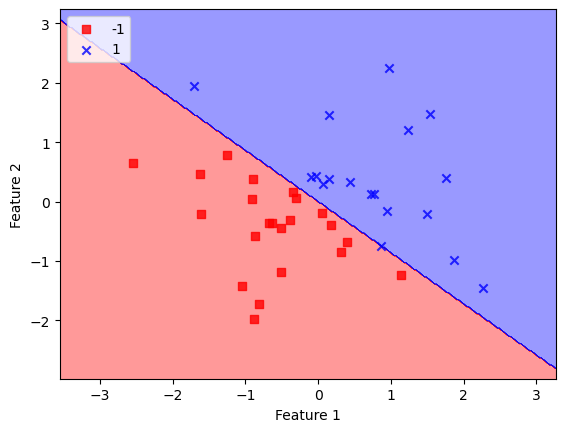

In [23]:
""" Example 3.1 """ 
# Create a linearly separable dataset
np.random.seed(0)
X = np.random.randn(40, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# Instance of Perceptron class
ppn = Perceptron(eta=0.1, n_iter=10)
# Fit 
ppn.fit(X, y)

##### Plot the decision regions and the data
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()

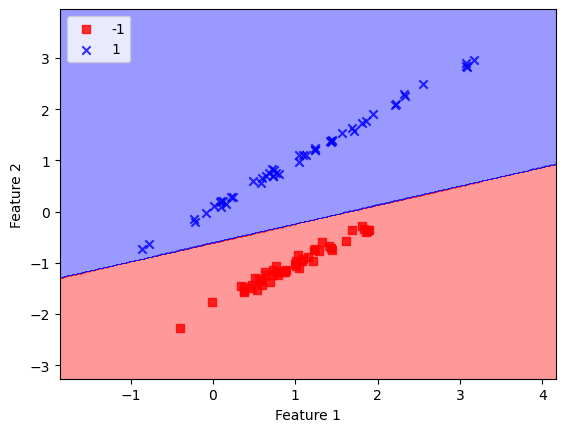

In [33]:
""" Example 3.2 """ 
# Create a linearly separable dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Modify class labels to match Perceptron's convention (e.g., Class 0 as -1, Class 1 as 1)
y = np.where(y == 0, -1, 1)

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()

<div style="line-height:0.5">
<h2 style="color:#F5BA69"> <u> Example 4 </u> <h2>
<h5> Using not linearly separable data of the Wine dataset. Only a single decision region with all data points is shown, <br>
<div style="line-height:1.8">
since the Perceptron cannot find the line that separate classes. <h5>
</div>

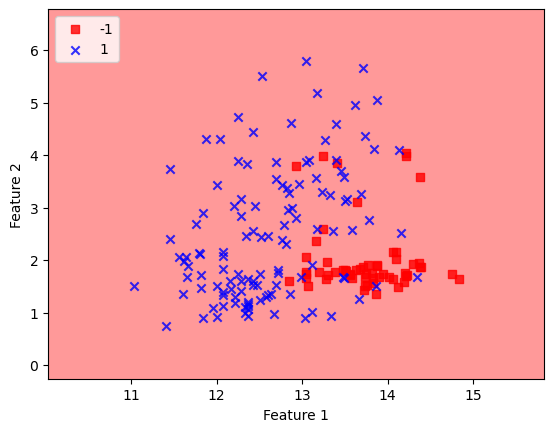

In [29]:
data = load_wine()
# Get X, taking the first two features for simplicity
X = data.data[:, [0, 1]]  
y = data.target
y = np.where(y == 0, -1, 1)  # Class 0 as -1, other classes as 1

ppn = Perceptron(eta=0.1, n_iter=10)
# Fit the Perceptron
ppn.fit(X, y)

# Display the decision regions and the data
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()


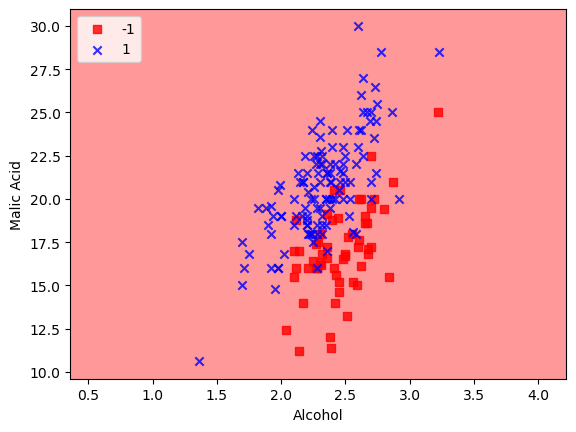

In [30]:
""" Try also with other features (the third and fourth). """
X = data.data[:, [2, 3]]  
y = data.target
y = np.where(y == 0, -1, 1)

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.show()

<div style="line-height:0.5">
<h2 style="color:#F5BA69; margin-bottom: 0;"> <u> Example 5 </u> <h2>
</div>
<div style="line-height:1">
<h5>
Another Percetron class that allows to use and adjust the coefficient 'm' of the linear equation of the boundary. <br>
It is useful to better handle cases where the best decision boundary works better wit a negative coefficient "m", <br>
a case where the positive class samples are below the boundary and the negative class samples are above it <br>
(the opposite of normal convention).
</h5>
</div>


In [56]:
class Perceptron2:
    def __init__(self, eta=0.01, n_iter=10, m=-2.0):
        self.eta = eta
        self.n_iter = n_iter
        self.m = m 

    def fit(self, X, y):
        y = y.reshape(-1)
        self.w_after = np.zeros(X.shape[1] + 2) 
        self.errors_ep = []
        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_after[2:] += update * xi
                self.w_after[1] += update * self.m  
                self.w_after[0] += update  
                errors += int(update != 0.0)
            self.errors_ep.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_after[2:].T) + self.w_after[0] + self.w_after[1] * self.m

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [57]:
data = load_breast_cancer()
num_rows = data.data.shape[0]
num_cols = data.data.shape[1]
num_rows, num_cols

(569, 30)

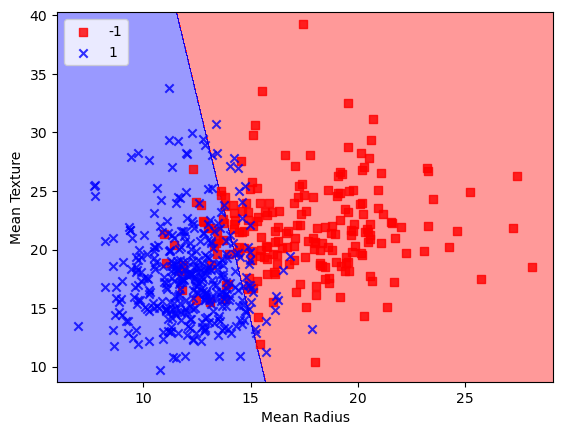

In [58]:
X = data.data[:, [0, 1]]        
y = data.target
y = np.where(y == 0, -1, 1)    

ppn = Perceptron2(eta=0.1, n_iter=10)
ppn.fit(X, y)

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend(loc='upper left')
plt.show()